## Boston Housing Prices Data Loading and Analysis

In [6]:
from sklearn import datasets

In [7]:
boston_data =  datasets.load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [10]:
description = boston_data.DESCR
print(description)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
attributes = boston_data.feature_names
print(attributes)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
import pandas as pd
df = pd.DataFrame(boston_data.data)
df.columns = attributes
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
X = boston_data.data
Y = boston_data.target

In [63]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
print(X_train.shape)
print(Y_train.shape)

(379, 13)
(379,)


In [65]:
from sklearn.linear_model import LinearRegression
housing_prices_algo = LinearRegression()
housing_prices_algo.fit(X_train, Y_train)
Y_predicted = housing_prices_algo.predict(X_test)
deviation = (Y_test-Y_predicted)
error_stats = pd.DataFrame(deviation*100/Y_test)
error_stats.columns = ["% Error"]
error_stats.describe()

,% Error
count,127.000000
mean,-3.285912
std,28.758638
min,-117.487465
25%,-12.160390
50%,-3.553285
75%,6.814472
max,149.563847


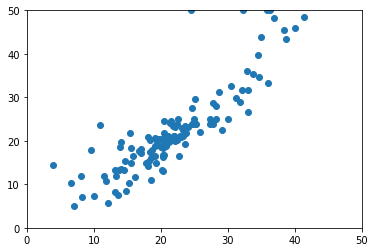

In [68]:
import matplotlib.pyplot as plt
plt.axis([0,50,0,50])
plt.scatter(Y_predicted, Y_test)
plt.show()